In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv('merged.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()

,JUL-22,AUG-22,SEP-22,OCT-22,NOV-22,DEC-22,JAN-23,FEB-23,MAR-23,APR-23,...,JUN-23,Feeder,Sub-Division,Division,JUL-23,Last_year_change,Last_year_month,Address,Customer ID,AUG-23
0,593.0,576.0,580.0,383.0,280.0,184.0,83.0,119.0,82.0,108.0,...,261.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,173.0,;↓-70.83%,JUL-22,H-3495D INS LOHARI GATE LHR,2416501,NaN
1,492.0,535.0,421.0,272.0,171.0,157.0,146.0,134.0,187.0,331.0,...,232.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,237.0,;↓-51.83%,JUL-22,D/3788 CHOWK BUKHARI 119 LAHORI GATE LHR,2416505,NaN
2,100.0,112.0,115.0,91.0,106.0,90.0,68.0,73.0,99.0,104.0,...,92.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,98.0,↓-2%,JUL-22,3789/D BUKHARY CHOWK I/S LAHORI GATE LAHORE.,2416506,NaN
3,75.0,86.0,88.0,41.0,45.0,55.0,42.0,50.0,43.0,47.0,...,77.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,99.0,↑32%,JUL-22,SHOP3788 OH CHAKLA IS LOHARIGA LHR,2416507,NaN
4,0.0,0.0,0.0,0.0,6.0,16.0,15.0,12.0,9.0,59.0,...,5.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,649.0,;↑100%,JUL-22,SHOP 3787D SUTTER MANDI LHR,2416508,NaN


### We want to use data from AUG-22 Till Jul-23. 

Useful Columns: 

- AUG-22 -> Jul-23
- Feeder
- Division
- Sub-Division
- Customer ID
- Address

In [3]:
df_clean = df[['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22', 'JAN-23', 'FEB-23', 'MAR-23', 'APR-23', 'MAY-23', 'JUN-23', 'JUL-23', 'Sub-Division', 'Division','Feeder', 'Customer ID', 'Address']]

df_clean

,AUG-22,SEP-22,OCT-22,NOV-22,DEC-22,JAN-23,FEB-23,MAR-23,APR-23,MAY-23,JUN-23,JUL-23,Sub-Division,Division,Feeder,Customer ID,Address
0,576.0,580.0,383.0,280.0,184.0,83.0,119.0,82.0,108.0,199.0,261.0,173.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416501,H-3495D INS LOHARI GATE LHR
1,535.0,421.0,272.0,171.0,157.0,146.0,134.0,187.0,331.0,317.0,232.0,237.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416505,D/3788 CHOWK BUKHARI 119 LAHORI GATE LHR
2,112.0,115.0,91.0,106.0,90.0,68.0,73.0,99.0,104.0,93.0,92.0,98.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416506,3789/D BUKHARY CHOWK I/S LAHORI GATE LAHORE.
3,86.0,88.0,41.0,45.0,55.0,42.0,50.0,43.0,47.0,32.0,77.0,99.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416507,SHOP3788 OH CHAKLA IS LOHARIGA LHR
4,0.0,0.0,0.0,6.0,16.0,15.0,12.0,9.0,59.0,6.0,5.0,649.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416508,SHOP 3787D SUTTER MANDI LHR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179344,366.0,461.0,307.0,178.0,131.0,143.0,90.0,112.0,144.0,220.0,286.0,129.0,D.H.A. EAST,DEFENCE EAST,RABANI MASJID (078101),9924795,NISHAT CLNY
4179345,58.0,36.0,28.0,13.0,3.0,15.0,96.0,84.0,167.0,255.0,235.0,324.0,D.H.A. EAST,DEFENCE EAST,KARAM ALI SHAH (078121),9924796,NISHAT CLNY
4179346,19.0,34.0,33.0,15.0,10.0,6.0,6.0,5.0,10.0,22.0,19.0,18.0,D.H.A. EAST,DEFENCE EAST,KARAM ALI SHAH (078121),9924797,NISHAT CLNY
4179347,14.0,24.0,12.0,43.0,55.0,64.0,48.0,49.0,49.0,33.0,41.0,42.0,D.H.A. EAST,DEFENCE EAST,KARAM ALI SHAH (078121),9924798,NISHAT CLNY


In [4]:
df_clean.columns

Index(['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22', 'JAN-23', 'FEB-23',
       'MAR-23', 'APR-23', 'MAY-23', 'JUN-23', 'JUL-23', 'Sub-Division',
       'Division', 'Feeder', 'Customer ID', 'Address'],
      dtype='object')

### Remove Consumers with no consumptions 

These are unused electricity meters, so they are outliers

In [5]:
zero_consumers = (df_clean[['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22',
                            'JAN-23', 'FEB-23', 'MAR-23', 'APR-23',
                            'MAY-23', 'JUN-23', 'JUL-23']].sum(axis=1) == 0)

df_clean = df_clean[~zero_consumers].reset_index(drop=True)

print(f"Remaining users: {len(df_clean)}")


Remaining users: 4169231


### Reshape the data for better time-series analysis

Each row will represent 1 month for one user. So each user will now have 12 rows, one for each month's consumption.

In [6]:
df_long = df_clean.melt(
    id_vars=['Customer ID', 'Address', 'Sub-Division', 'Division', 'Feeder'],
    value_vars=['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22',
                'JAN-23', 'FEB-23', 'MAR-23', 'APR-23', 'MAY-23', 'JUN-23', 'JUL-23'],
    var_name='Month',
    value_name='Units_Consumed'
)

df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b-%y')
df_long = df_long.sort_values(by=['Customer ID', 'Month']).reset_index(drop=True)


In [7]:
df_long

,Customer ID,Address,Sub-Division,Division,Feeder,Month,Units_Consumed
0,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-08-01,299.0
1,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-09-01,271.0
2,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-10-01,393.0
3,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-11-01,429.0
4,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-12-01,797.0
...,...,...,...,...,...,...,...
50030767,10019998,"HNO 285/F/BLOCK C, MARAGHZAR COLONY MULTAN RD",RANA TOWN,ALAMA IQBAL,AMNA PARK (059913),2023-03-01,59.0
50030768,10019998,"HNO 285/F/BLOCK C, MARAGHZAR COLONY MULTAN RD",RANA TOWN,ALAMA IQBAL,AMNA PARK (059913),2023-04-01,0.0
50030769,10019998,"HNO 285/F/BLOCK C, MARAGHZAR COLONY MULTAN RD",RANA TOWN,ALAMA IQBAL,AMNA PARK (059913),2023-05-01,95.0
50030770,10019998,"HNO 285/F/BLOCK C, MARAGHZAR COLONY MULTAN RD",RANA TOWN,ALAMA IQBAL,AMNA PARK (059913),2023-06-01,119.0


In [8]:
df_long.head(12)
df = df_long.copy()

## Outliers which are commercials usages

/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/3194819365.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Consumption_Per_Consumer', y='Division', data=high_consumption_divisions, palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas

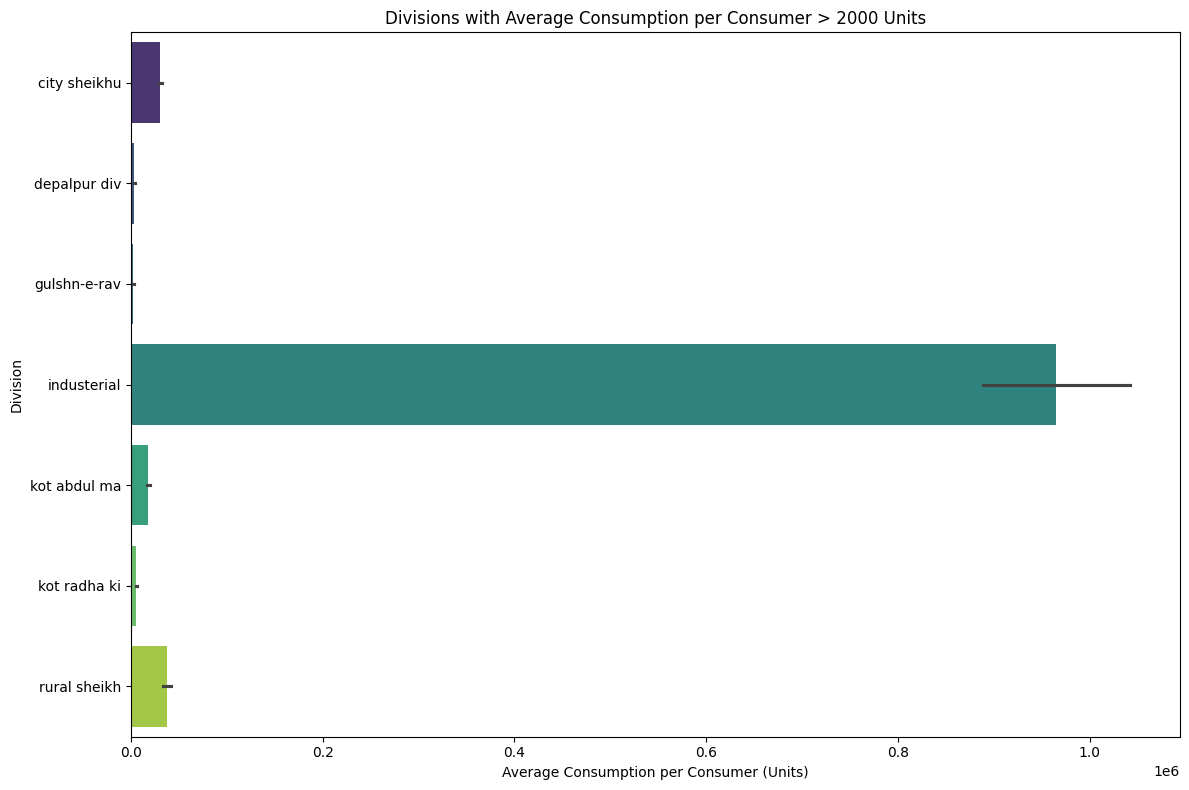

         Division  Month_Number         sum  count  \
84   city sheikhu             1  87490054.0   2774   
85   city sheikhu             2  91749740.0   2774   
86   city sheikhu             3  82747210.0   2774   
87   city sheikhu             4  75682271.0   2774   
88   city sheikhu             5  82153778.0   2774   
..            ...           ...         ...    ...   
499  rural sheikh             8  91832483.0   1813   
500  rural sheikh             9  81822814.0   1813   
501  rural sheikh            10  73834327.0   1813   
502  rural sheikh            11  73559320.0   1813   
503  rural sheikh            12  66434665.0   1813   

     Average_Consumption_Per_Consumer  
84                       31539.312906  
85                       33074.888248  
86                       29829.563807  
87                       27282.722062  
88                       29615.637347  
..                                ...  
499                      50652.224490  
500                      45131.

In [9]:
# Ensure 'Month' is in datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Extract the month number for trend analysis
df['Month_Number'] = df['Month'].dt.month
df['Division'] = df['Division'].str.strip().str.lower()

# Exclude the 'industrial' division from the analysis
df_filtered = df[df['Division'] != 'industrial']

# Group by 'Division' and calculate total consumption and number of consumers
division_monthly_data = df_filtered.groupby(['Division', 'Month_Number'])['Units_Consumed'].agg(['sum', 'count']).reset_index()

# Calculate average consumption per consumer
division_monthly_data['Average_Consumption_Per_Consumer'] = division_monthly_data['sum'] / division_monthly_data['count']

# Filter out divisions with average consumption per consumer > 2000
high_consumption_divisions = division_monthly_data[division_monthly_data['Average_Consumption_Per_Consumer'] > 2000]

# Plotting the divisions with high average consumption per consumer
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Consumption_Per_Consumer', y='Division', data=high_consumption_divisions, palette='viridis')
plt.title('Divisions with Average Consumption per Consumer > 2000 Units')
plt.xlabel('Average Consumption per Consumer (Units)')
plt.ylabel('Division')
plt.tight_layout()
plt.show()

# Display the filtered high consumption divisions
print(high_consumption_divisions)

## Residential Divisions 

/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/1130463848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Consumption_Per_Consumer', y='Division', data=residential_consumers, palette='coolwarm')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pas

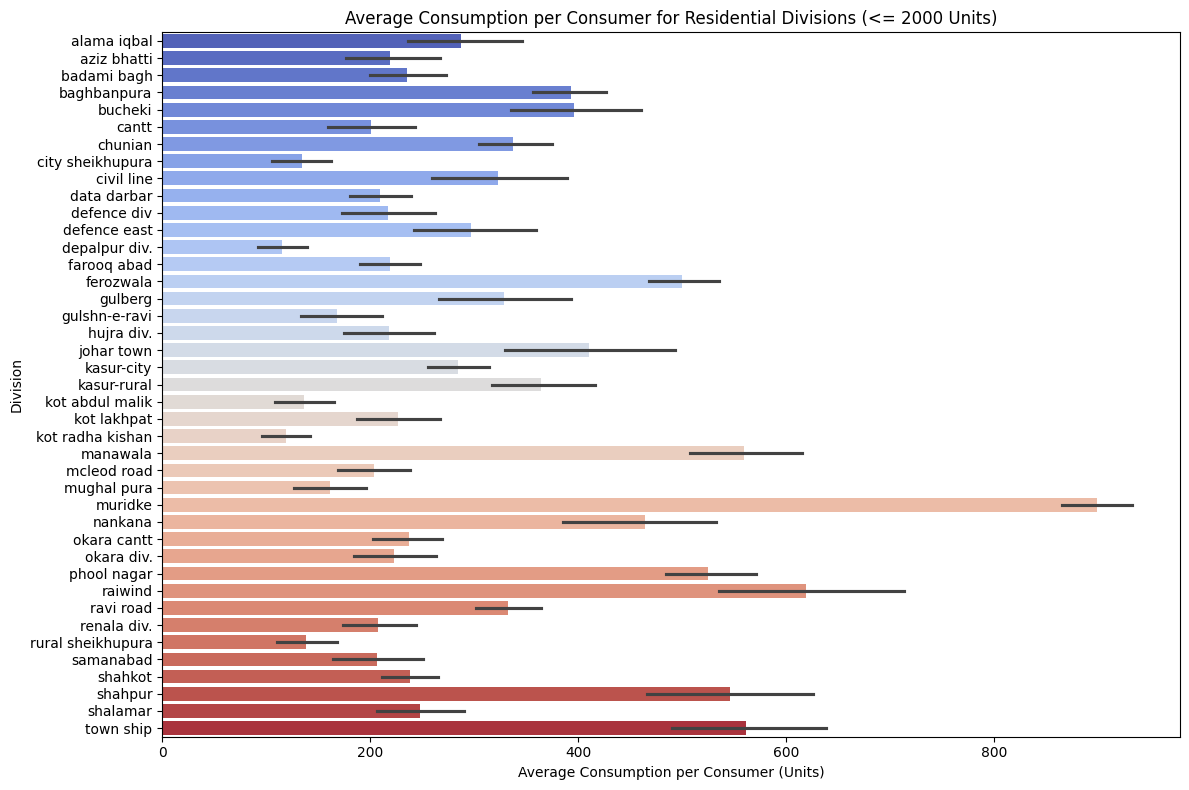

Division
muridke        899.497587
raiwind        618.959654
town ship      561.877659
manawala       559.420210
shahpur        546.030306
phool nagar    524.822914
ferozwala      500.179135
nankana        463.973235
johar town     410.142124
bucheki        395.763028
Name: Average_Consumption_Per_Consumer, dtype: float64


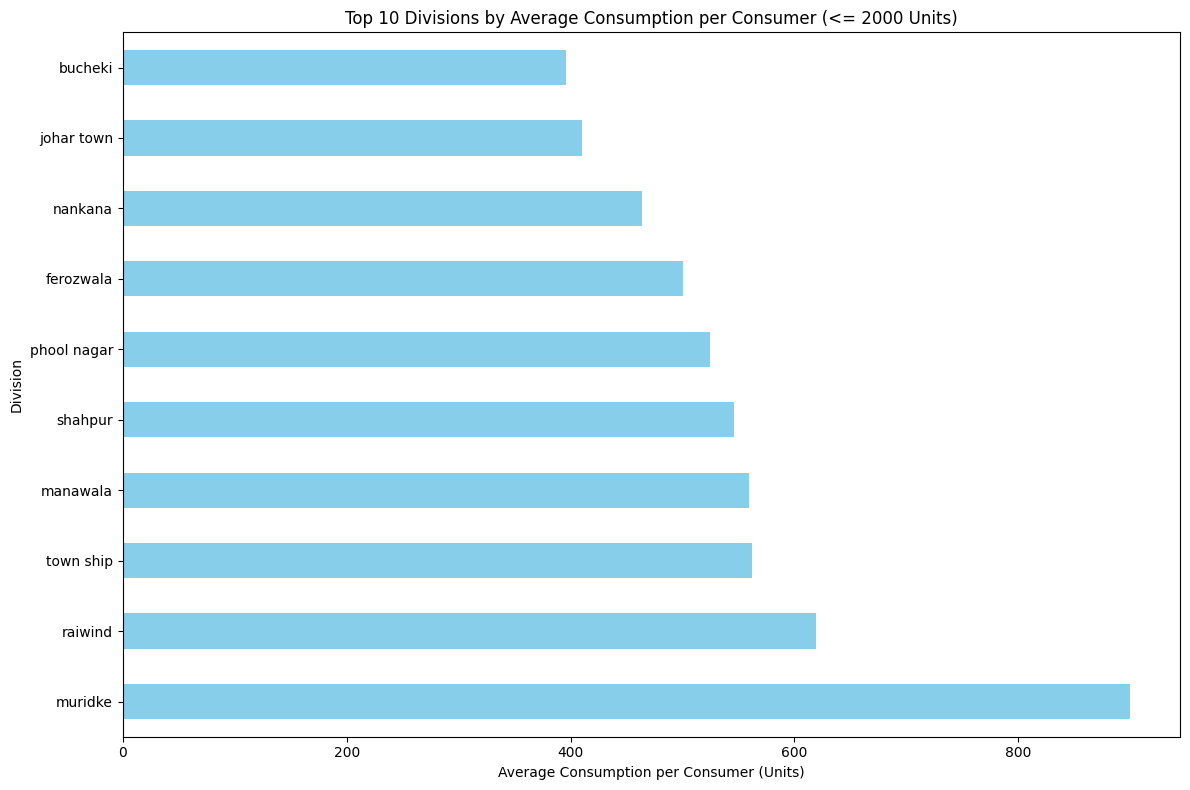

In [10]:
residential_consumers = division_monthly_data[division_monthly_data['Average_Consumption_Per_Consumer'] <= 2000]

residential_consumers

plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Consumption_Per_Consumer', y='Division', data=residential_consumers, palette='coolwarm')
plt.title('Average Consumption per Consumer for Residential Divisions (<= 2000 Units)')
plt.xlabel('Average Consumption per Consumer (Units)')
plt.ylabel('Division')
plt.tight_layout()
plt.show()

# Grouping by 'Division' to calculate the average consumption per consumer
division_avg_consumption = residential_consumers.groupby('Division')['Average_Consumption_Per_Consumer'].mean().sort_values(ascending=False)

# Displaying the top 10 divisions with the highest average consumption per consumer
top_residential_divisions = division_avg_consumption.head(10)

# Display the top divisions with their average consumption
print(top_residential_divisions)

# You can also visualize the top divisions using a bar plot
plt.figure(figsize=(12, 8))
top_residential_divisions.plot(kind='barh', color='skyblue')
plt.title('Top 10 Divisions by Average Consumption per Consumer (<= 2000 Units)')
plt.xlabel('Average Consumption per Consumer (Units)')
plt.ylabel('Division')
plt.tight_layout()
plt.show()



## Socioeconomic Tiers based on Monthly average consumption per consumer (units)

/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/3819977771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_consumers['Socioeconomic_Tier'] = pd.qcut(
/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/3819977771.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_trends = residential_consumers.groupby(['Socioeconomic_Tier', 'Month_Number'])['Average_Consumption_Per_Consumer'].mean().reset_index()
/Library/Frameworks/Python.framework/Versions/3.11

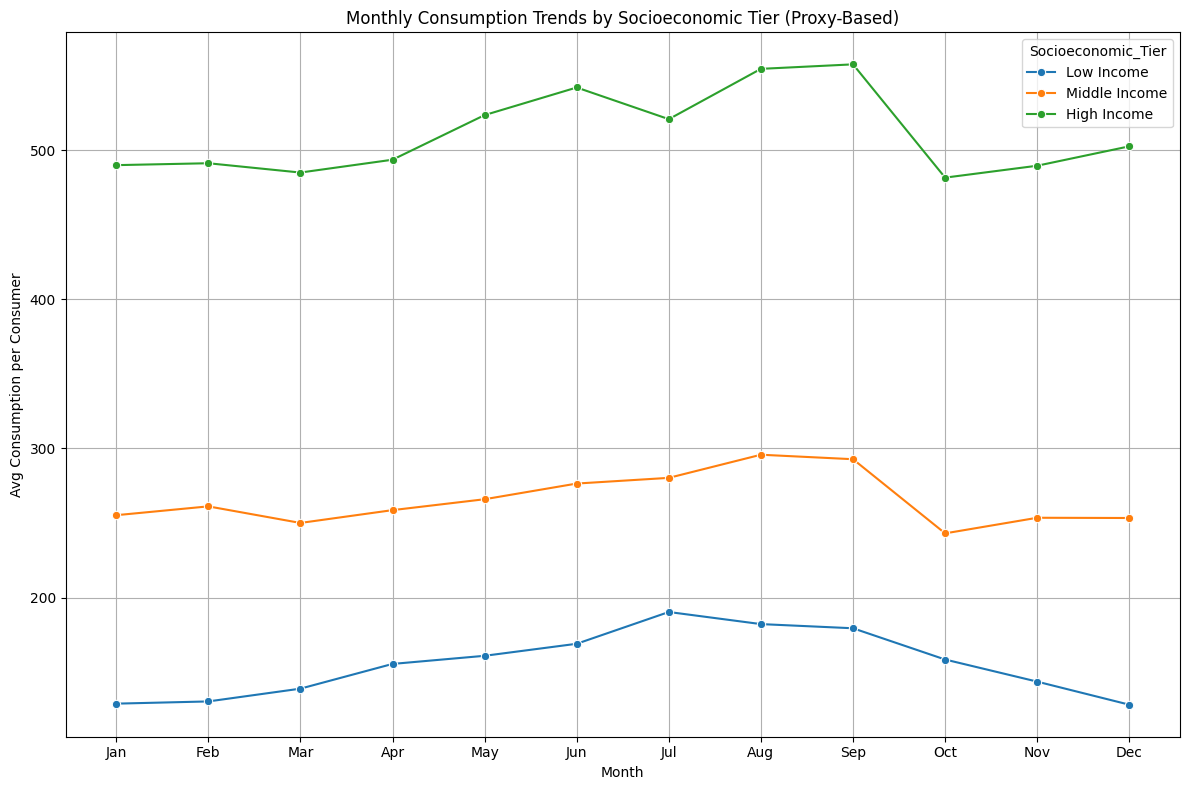

In [11]:

# Create bins: Low, Middle, High consumption
residential_consumers['Socioeconomic_Tier'] = pd.qcut(
    residential_consumers['Average_Consumption_Per_Consumer'],
    q=3,
    labels=['Low Income', 'Middle Income', 'High Income']
)


tier_trends = residential_consumers.groupby(['Socioeconomic_Tier', 'Month_Number'])['Average_Consumption_Per_Consumer'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=tier_trends, x='Month_Number', y='Average_Consumption_Per_Consumer', hue='Socioeconomic_Tier', marker='o')
plt.title('Monthly Consumption Trends by Socioeconomic Tier (Proxy-Based)')
plt.xlabel('Month')
plt.ylabel('Avg Consumption per Consumer')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/1405504336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_counts = residential_consumers.groupby(['Division', 'Socioeconomic_Tier']).size().reset_index(name='Count')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1

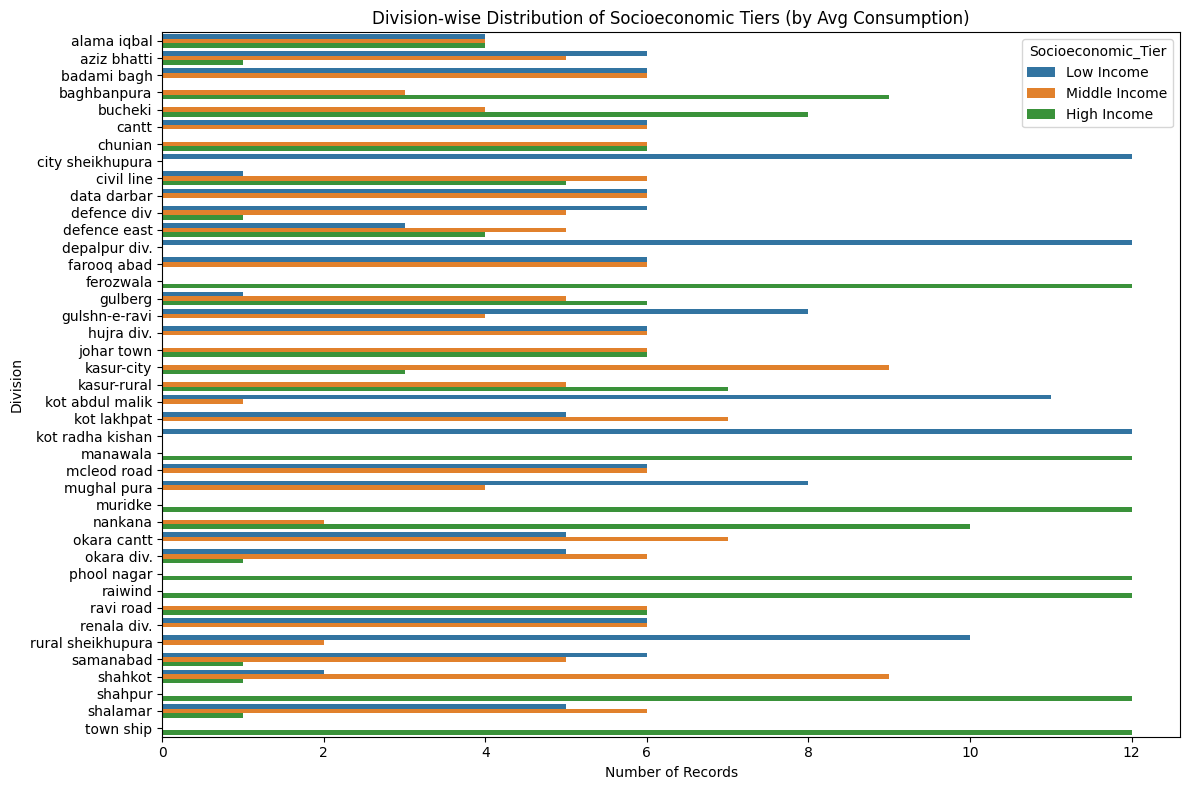

In [12]:
tier_counts = residential_consumers.groupby(['Division', 'Socioeconomic_Tier']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(data=tier_counts, x='Count', y='Division', hue='Socioeconomic_Tier')
plt.title('Division-wise Distribution of Socioeconomic Tiers (by Avg Consumption)')
plt.xlabel('Number of Records')
plt.ylabel('Division')
plt.tight_layout()
plt.show()



## Seasonal Trends between divisons


/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/3766578538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_consumers['Season'] = residential_consumers['Month_Number'].apply(label_season)


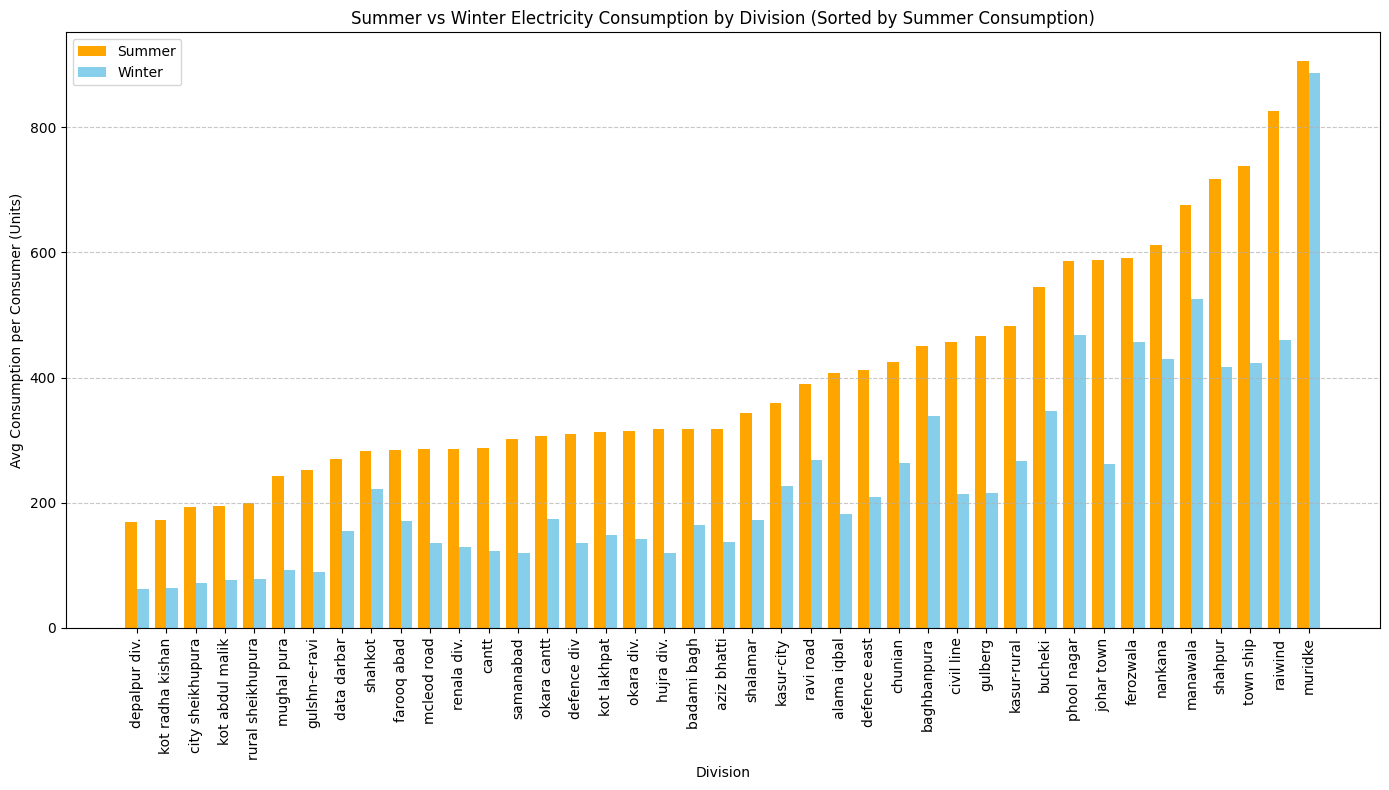

In [13]:
def label_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Other'

residential_consumers['Season'] = residential_consumers['Month_Number'].apply(label_season)


seasonal_trends = residential_consumers.groupby(['Division', 'Season'])['Average_Consumption_Per_Consumer'].mean().reset_index()


seasonal_pivot = seasonal_trends.pivot(index='Division', columns='Season', values='Average_Consumption_Per_Consumer').reset_index()

# Optional: sort by difference
seasonal_pivot['Difference'] = seasonal_pivot['Summer'] - seasonal_pivot['Winter']
seasonal_pivot = seasonal_pivot.sort_values(by='Summer', ascending=True)  # For sorting by Summer


plt.figure(figsize=(14, 8))
bar_width = 0.4
index = np.arange(len(seasonal_pivot))

plt.bar(index, seasonal_pivot['Summer'], bar_width, label='Summer', color='orange')
plt.bar(index + bar_width, seasonal_pivot['Winter'], bar_width, label='Winter', color='skyblue')

plt.xlabel('Division')
plt.ylabel('Avg Consumption per Consumer (Units)')
plt.title('Summer vs Winter Electricity Consumption by Division (Sorted by Summer Consumption)')
plt.xticks(index + bar_width / 2, seasonal_pivot['Division'], rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


## Percentages of Feeders in different groups

/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/3948167314.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feeder_category_counts = df.groupby('Consumption_Category')['Feeder'].nunique().reset_index()


  Consumption_Category  Percentage
0                0-300   25.482030
1              300-700   23.415086
2             700-2000   22.551288
3                2000+   28.551596


/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/3948167314.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Consumption_Category', y='Percentage', data=feeder_category_counts, palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,

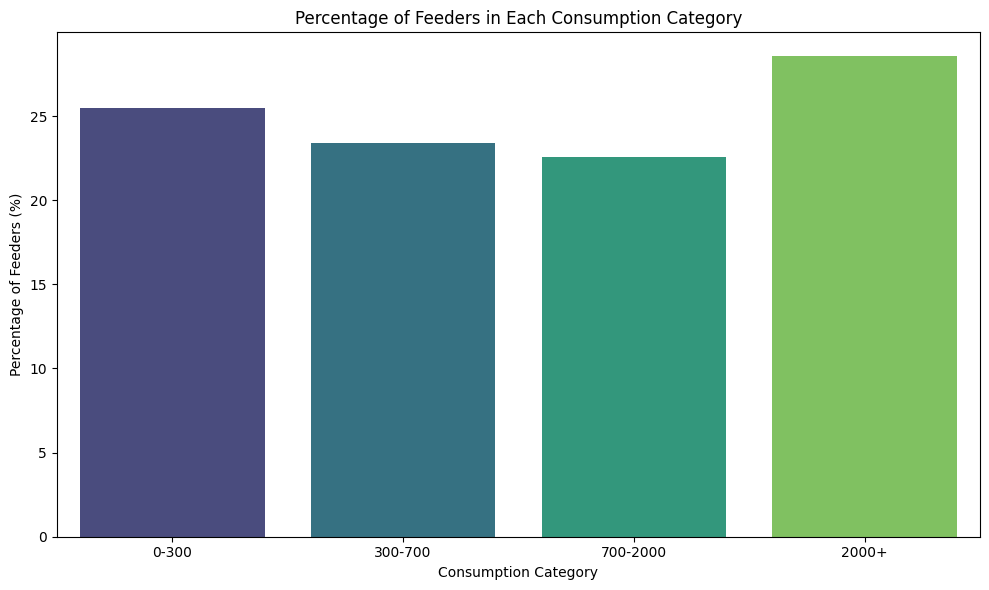

In [14]:
# Categorizing the 'Units_Consumed' into the specified ranges
bins = [0, 300, 700, 2000, float('inf')]
labels = ['0-300', '300-700', '700-2000', '2000+']

df['Consumption_Category'] = pd.cut(df['Units_Consumed'], bins=bins, labels=labels, right=False)

# Grouping by Consumption Category to count unique feeders in each category
feeder_category_counts = df.groupby('Consumption_Category')['Feeder'].nunique().reset_index()
feeder_category_counts.rename(columns={'Feeder': 'Feeder_Count'}, inplace=True)

# Calculate the total number of unique feeders across all categories
total_feeders = feeder_category_counts['Feeder_Count'].sum()

# Calculate the percentage of feeders in each category, ensuring the total sums to 100%
feeder_category_counts['Percentage'] = (feeder_category_counts['Feeder_Count'] / total_feeders) * 100

# Display the results
print(feeder_category_counts[['Consumption_Category', 'Percentage']])

# Plotting the percentage of feeders in each consumption category
plt.figure(figsize=(10, 6))
sns.barplot(x='Consumption_Category', y='Percentage', data=feeder_category_counts, palette='viridis')
plt.title('Percentage of Feeders in Each Consumption Category')
plt.xlabel('Consumption Category')
plt.ylabel('Percentage of Feeders (%)')
plt.tight_layout()
plt.show()



## Clusters (not sure what insight to get from this)

/var/folders/w0/174_z95x3hdfklrkc5qp207w0000gp/T/com.apple.shortcuts.mac-helper/ipykernel_32337/2707882044.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_consumers['Cluster'] = clusters


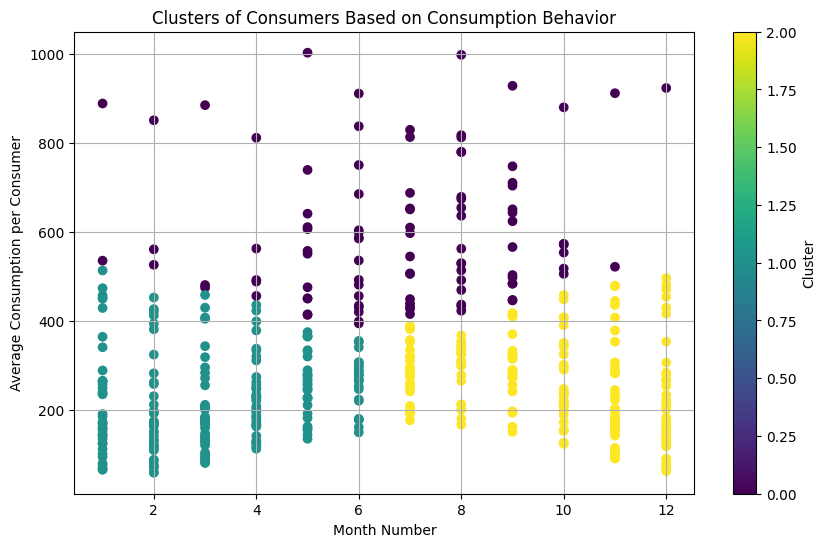

Cluster
0    598.365254
1    223.385179
2    254.408570
Name: Average_Consumption_Per_Consumer, dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler

# Extract the relevant features for clustering
# In this case, we can take the monthly consumption as the feature for each consumer, and possibly the division info
# Assuming we are interested in 'Average_Consumption_Per_Consumer' and 'Month_Number'
clustering_data = residential_consumers[['Average_Consumption_Per_Consumer', 'Month_Number']]

# Normalize the data so that the clustering algorithm can work effectively
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares (Inertia)
for k in range(1, 11):  # Testing k values from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)


# Apply KMeans with the selected number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster labels to the original data
residential_consumers['Cluster'] = clusters


# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(residential_consumers['Month_Number'], residential_consumers['Average_Consumption_Per_Consumer'], c=residential_consumers['Cluster'], cmap='viridis')
plt.title('Clusters of Consumers Based on Consumption Behavior')
plt.xlabel('Month Number')
plt.ylabel('Average Consumption per Consumer')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Check the mean consumption for each cluster
cluster_means = residential_consumers.groupby('Cluster')['Average_Consumption_Per_Consumer'].mean()
print(cluster_means)

